In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("D:\pandasdataset\project\emails.csv",nrows=3000)

In [3]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
data=pd.DataFrame(data)

In [5]:
data.describe

<bound method NDFrame.describe of                                                    text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
2995  Subject: re : part - time work  vince ,  zimin...     0
2996  Subject: re : congratulations  vince ,  congra...     0
2997  Subject: re : risk ' s advanced stress testing...     0
2998  Subject: re : enron / stanford program  vince ...     0
2999  Subject: breckenridge offsite  hello all :  fy...     0

[3000 rows x 2 columns]>

In [6]:
#REMOVING SUBJECT FROM TEXT COLUMN
text_split=data['text'].str.split(':',n=1,expand=True)

In [7]:
data['text']=text_split[1]

In [8]:
data

,text,spam
0,naturally irresistible your corporate identit...,1
1,the stock trading gunslinger fanny is merril...,1
2,unbelievable new homes made easy im wanting ...,1
3,4 color printing special request additional ...,1
4,"do not have money , get software cds from her...",1
...,...,...
2995,"re : part - time work vince , zimin and i t...",0
2996,"re : congratulations vince , congratulation...",0
2997,re : risk ' s advanced stress testing course ...,0
2998,"re : enron / stanford program vince , i hav...",0


In [9]:
x=data.text
y=data.spam

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
vectorizer=TfidfVectorizer()
#vectorizer=TfidfVectorizer(token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
x1=vectorizer.fit_transform(x)
feature_name=vectorizer.get_feature_names()

In [12]:
len(feature_name)

29767

In [13]:
feature_name[20000:20010]

['panama',
 'panami',
 'panamsat',
 'panasonic',
 'pancake',
 'pancaking',
 'panda',
 'pandemic',
 'pandemonium',
 'paneiized']

In [14]:
x1=x1.toarray()

In [15]:
x1.shape

(3000, 29767)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3)

In [17]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB(alpha=0.71)
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
from sklearn.metrics import classification_report,accuracy_score
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9733333333333334
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       487
           1       0.95      1.00      0.97       413

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



col_0,0,1
spam,,
0,465,22
1,2,411


C:\Users\WIN 7\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\WIN 7\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


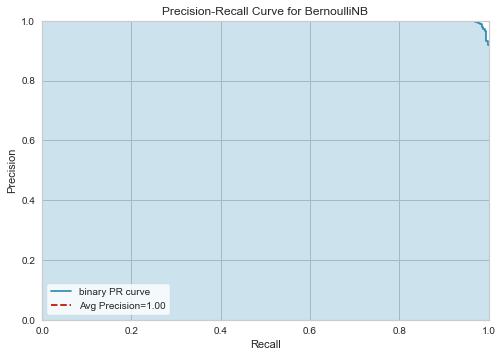

In [18]:
from yellowbrick.classifier import PrecisionRecallCurve
viz=PrecisionRecallCurve(model)
viz.fit(x_train,y_train)
viz.score(x_test,y_test)
viz.show()

In [19]:
newmail=pd.Series(["re: do not have money , get software cds from her"])

In [20]:
newemail_transform=vectorizer.transform(newmail)

In [21]:
newemail_transform.shape

(1, 29767)

In [23]:
model.predict(newemail_transform)[0]

1